In [30]:
import sys
sys.path.append('../')
import base
import matplotlib.pyplot as plt
import numpy as np
import os
import fnmatch

In [31]:
root_paths1 = ['../../Data/Raw/']*8
root_paths2 = ['../../Data/Raw/']*7
tags1 = ['20190923-174441', '20191001-112411', '20191002-115000', \
        '20191106-170809', '20191107-183857', '20191108-145125', \
       '20191118-161325', '20191127-122008']
tags2 = ['20190923-171112', '20191001-115127', '20191002-111038',\
         '20191107-174215', '20191108-142321', '20191118-171209',\
         '20191127-132223']
rat_fs1 = base.MultiDaysBeaconPosition(root_paths1, tags1, has_beacon = False, has_metadata= False)
rat_fs2 = base.MultiDaysBeaconPosition(root_paths2, tags2, has_beacon = False, has_metadata = False)

In [32]:
rat_fs1.multisession_statistics

{'avg_speed': 12.293938090780372,
 'avg_distance': 145.23547337956376,
 'median_speed': 8.46040608747937}

In [33]:
tags1

['20190923-174441',
 '20191001-112411',
 '20191002-115000',
 '20191106-170809',
 '20191107-183857',
 '20191108-145125',
 '20191118-161325',
 '20191127-122008']

## Crawling function to generate tags automatically for each animal on file. 

In [34]:
def Make_tags (rat_ID):
    """Takes in animal ID and searches through a specific subfolder in storage 2 to generate time tags for each session
    
    PARAMS
    ------------
    rat_ID : str
        name of animal
    
    Returns
    ------------
    list of str of roots and list of str of tags - date time  
    
    """
    rat_ID = "FS11/"
    animal= '//10.153.170.3/storage2/fabian/data/project/'+rat_ID 
    dirnames = [ name for name in os.listdir(animal) if os.path.isdir(os.path.join(animal, name)) ]   
    roots = [k for k in dirnames if 'BP' in k]
    filter_tags = [x[-15:] for x in roots]
    filter_roots = [animal + s for s in roots]
    return filter_roots, filter_tags, 
root, tags = Make_tags ("FS11")

In [48]:
root, tags = Make_tags ("FS11")
#print (root)
#print( tags)
rat_fs11 = base.MultiDaysBeaconPosition(root, tags, has_beacon = False, has_metadata= False)

In [49]:
rat_fs11.num_sessions



26

In [59]:
rat_fs11.median_speed

14.087978755110573

In [60]:
rat_fs11.get_trials

<bound method MultiDaysBeaconPosition.get_trials of <base.MultiDaysBeaconPosition object at 0x0000000019E98C18>>

In [66]:
rat_fs11.dataset_list[0:5]

In [62]:
data = rat_fs11.dataset_list[1]
#data = rat_fs11.get_trials
for trial in data.trial_list:
    plt.scatter(trial[:,1], trial[:,2], s=1)

AttributeError: 'BeaconPosition' object has no attribute 'trial_list'

In [57]:
data = base.BeaconPosition(root[1], tags[1], has_beacon = True, has_metadata = True)
data

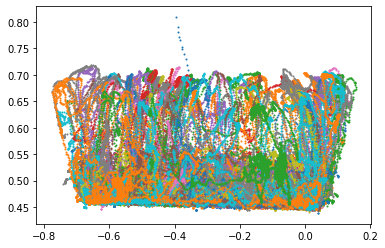

In [58]:

for trial in data.trial_list:
    plt.scatter(trial[:,1], trial[:,2], s=1)